# Final Project - MShah - 05112019 

##### In this final I will attempt to create two separate projects. The first is an animation of the heat equation in 3-dimensions. The second is a propagated wave equation similar to sound waves. Both codes will be using python as the coding platform/language. I will start by modifying my midterm code in order to create the inhomogenous wave equation. I will first start by creating the traveling wave equation then moving onto the inhomogenous function.

## Traveling Wave / Failed Inhomogenous Wave Equation

In [1]:
#Import the proper packets needed.
import numpy as np
from numpy import pi,sin,cos,sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

Parameters are shown below. Each parameter can be changed here to obtain different wave oscillations.

In [30]:
#Parameters

#Wave Parameters
speed = 15    #Wave Speed
fx = 1        #Wave Frequency in X
fy = 1        #Wave Frequency in Y
u = 5         #Wave Ratio X
w = 5         #Wave Ratio Y
#Time Parameters
ts = 0.001     #Time Step
ti = 0         #Initial Time Preallocated

Here we have the equations used to create the wave function.

In [17]:
#Equations

#Nested function - Omega Frequency
freq = sqrt(fx**2+fy**2) * speed * pi                                     #Omega Frequency Value

#Wave function (defined to be called later)
def wave(x,y,t):                                                    
    
    #Defined function for the standing wave [Midterm]
    #return sin(pi*fx*x) * sin(fy*pi*y) * (cos(freq*t) + sin(freq*t)) 
    
    #Defined Traveling Wave [Final]
    return ((1/sqrt(fx**2+fy**2))*(sin(u*x+w*t))) + ((1/sqrt(fx**2+fy**2))*(sin(u*y+w*t)))

Previously, for the midterm project, I defined the function (wave) as a standing wave as depicted in the commented out function above. However, for the final project I modified the equation to represent the propagated wave function. I began with the traveling wave function which is shown in the non-commented out equations above. Attempts at creating an equation for the inhomogenous wave equation didn't work. This was due to the complex nature of the solution. Further work is needed to achieve that.

In [18]:
#Construction of vectors and meshgrid
x = np.linspace(0,1)     #x vector created
y = np.linspace(0,1)     #y vector created

#Meshgrid construction 
X,Y = np.meshgrid(x,y)   #Grid created with size x by y.

Here we have the for loop used to create data that will be used during the animations.

In [31]:
d = []               #Empty data vector pre-allocated
for r in range(500):    #For loop used to set range for animation
    c = wave(X,Y,ti)    #Wave equation defined as single variable
    ti = ti + ts        #ti is allowed to change value for each time step to compute the next point
    d.append(c)         #Append adds a value to the end of the list in the c variable (developing c as a function of time)

3D figures are called using matplotlib and sizes are adjusted. color bars are made and the animation is created and run. These must all be in the same cell so that they can function properly.

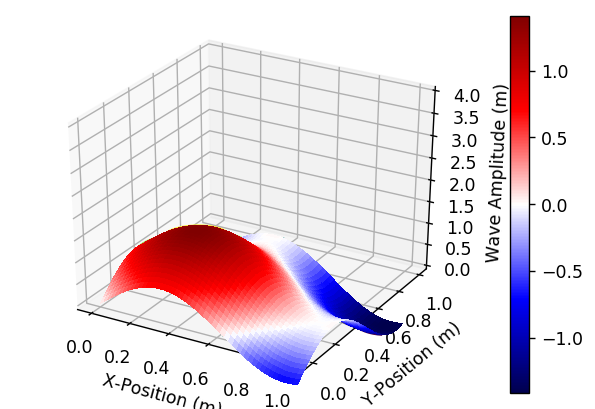

In [32]:
#Figure plotted using fig variable so it can be animated later
fig = plt.figure()

#Type of figure is set
plot = fig.gca(projection='3d')

#Size of the figure is set
fig.set_dpi(125)

#Color bar and animation is created.
color = plt.cm.ScalarMappable(cmap=plt.cm.seismic)
color.set_array(d[0])
cbar = plt.colorbar(color)

p = 0 #Preallocation of p variable for animation

#Definition of timeevolution animation is created with dependency on r.
#Plotting of the meshgrid surface is done. rstride and cstride creates an equal color distribution. Color is added
#linewidth and antialiasing affect the display of the figure.
def timeevolution(r):
    global p       #Calls p from outside the user defined function
    Z = d[p]    #Z parameter is set equal to the value the data at location p in the array.
    p += 1         #The position of the data value is changed
    plot.clear()     #Previous plots are cleared.
    plot.plot_surface(X,Y,Z,label='Wave Function', rstride=1, cstride=1,cmap=plt.cm.seismic,linewidth=0,antialiased=False)
    plot.contour(X,Y,Z)   #Contour lines are added
    plot.set_zlim(0,4)    #Size of the z axis is created
    plot.set_xlabel('X-Position (m)')
    plot.set_ylabel('Y-Position (m)')
    plot.set_zlabel('Wave Amplitude (m)')

#Plotting of the meshgrid surface is done. rstride and cstride creates an equal color distribution. Color is added
#linewidth and antialiasing affect the display of the figure.
#Animations are created based on the figure and the defined animation function.
anim = animation.FuncAnimation(fig,timeevolution)
plt.show()


Here we have the plot of the wave function. I found that this animation only works in the Enthought Canopy python code editor. For some reason it didn't work in spyder3. I would have liked to continue forward and produce the sonar/wave propagation animations but that will require some more time. This was very time consuming but it was a lot of fun to create this animation. I've done something similar in the past in matlab but never in python so it was nice to see that translation.

From the result above, and by testing multiple initial times, we can clearly see that the wave is propagating. The animation works in python 3 so you may need to run this in an external compiler to see it. It works in Enthought Canopy for me. 

## The Heat Equation

In [85]:
import numpy as np
from math import pi,sin,cos,sqrt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

Proper packages are imported above and parameters are created below.

In [95]:
# Temperature of walls [Front, Left, Right, Back]
Wfront = 31
Wleft = 13
Wright = 43
Wback = 53

#Thermal diffusivity
thermdif = 0.000099

#Time - Final run time and time step
tf = 30
dt = 0.05
#Time array is preallocated from 0 to the final time with respect to each timestep.
t = np.arange(0,tf,dt)

Here we identify our parameters. In this case, we have the 4 wall temperatures, the thermal diffusion coefficient, and the time parameters.

In [97]:
#Dimensions of 'box'(Length from wall to wall)
sizex = 0.5
sizey = 0.5
#Number of points between each step (divides the steps even further to create a set length and to increase resolution)
points=30
#Number of steps between walls. The length is divided into n points.
dx = sizex/points
dy = sizey/points

Size parameters are added. dx and dy are defined as the number of points taken between each wall. 

In [98]:
#x and y spatial array is created and a mesh grid is attributed to it. We use the midpoint between each point. (dx/2)
#The array will have length from the midpoint of the first value along dx/dy and a last point (before wall).
x = np.linspace(dx/2, sizex - dx/2, n)
y = np.linspace(dy/2, sizey - dy/2, n)

#A meshgrid is created using the spatial arrays above.
X,Y = np.meshgrid(x,y)


Meshgrid is created for the x and y spatial domains. The length of the vector is given from the first midpoint to the last midpoint along the length between the walls.

In [99]:
#Creation of temperature arrays/loop. 

#Temperature array is created. for loop is needed to pass x and y values through the array to compute the temperature.
#Modifying the constant before the sin function gives different intial temperatures.

Tempx = np.array([20*sin(pi*i/sizex) for i in x])
Tempy = np.array([20*sin(pi*i/sizey) for i in y])

#Meshgrid of thermal values is created.
TempX, TempY = np.meshgrid(Tempx,Tempy)

Temperature arrays are created for x and y and a meshgrid is created.

In [101]:
#Here empty vectors are preallocated so that the animation can be constructed. 
Animatex = np.empty(n)
Animatey = np.empty(n)

An animation array is preallocate for x and y.

In [102]:
#3D plot is called from matplotlib
fig = plt.figure()
ax = fig.gca(projection='3d')

3D plot is called.

In [103]:

#For loop is created with the length of time. Thus it will animate for the designated time then stop.
for n in range(1,len(t)):

    ax.clear() #Previous plot is cleared

    for m in range(1,points-1): #For loop is created to iterate over the spatial domain.
        
        #Animation is utilized here. We are using the for loop to compute the derivative in order to produce the next value of temperatures.
        Animatex[m] = thermdif*((Tempx[m+1]-(2*Tempx[m])+Tempx[m-1])/dx**2)
        Animatey[m] = thermdif*((Tempy[m+1]-(2*Tempy[m])+Tempy[m-1])/dx**2)

    
    #Here we add the boundary conditions. We use the Animate function to iterate over the derivatives of values near each wall. This allows us to input the
    #temperature of the wall and allow the program to loop over each point along the grid between walls.
    Animatex[0] = thermdif*((Tempx[1]-(2*Tempx[0])+Wfront)/dx**2)
    Animatey[0] = thermdif*((Tempy[1]-(2*Tempy[0])+Wright)/dx**2)
    Animatex[points-1] = thermdif*((Wleft-(2*Tempx[points-1])+Tempx[points-2])/dx**2)
    Animatey[points-1] = thermdif*((Wback-(2*Tempy[points-1])+Tempy[points-2])/dx**2)


    #Here we use replace the temperature values in x and y. This allows the figure to refresh the final temperature meshgrid with new values.
    Tempx = Tempx + Animatex*dt
    Tempy = Tempy + Animatey*dt
    TempX, TempY = np.meshgrid(Tempx,Tempy)

    #The results from the temperature meshgrid are both set equal to the variable T (temperature). This is the z-axis in the plot. 
    T = (TempX + TempY)
    
    #Surf takes in the the arrays X,Y, and T and maps it to a 3D figure.
    surf = ax.plot_surface(X,Y,T, cmap=cm.bwr,
                           linewidth=0, antialiased = False)
    
    #Axis limitations are set.
    ax.set_zlim(0,120)
    ax.set_xlim(0,0.5)
    ax.set_ylim(0,0.5)
    
    #Axis labels are created
    ax.set_xlabel('Distance (meters)')
    ax.set_ylabel('Distance (meters)')
    ax.set_zlabel('Temperature (C)')
    
    #Figure is created.
    plt.show()
    plt.pause(0.001)

Two for loops are used to create the workhorse of this code. The first loop iterates over time. So long as time is less than the maximum value the code will animate. The second loop iterates over the spatial and temperature arrays. A derivative is calculated for the animations at each midpoint and the new value is created. The animation is computed over the spatial domain and the passed to the temperature domain and the tempreatures are then animated using the surf command. Axis labels and limits are created and the figure is created.